<a href="https://colab.research.google.com/github/fabiobento/dnn-course-2024-1/blob/main/00_course_folder/cert_prof_dl_intro/3%20-%20Aprimoramento%20da%20vis%C3%A3o%20com%20redes%20neurais%20convolucionais/10%20-%20C1_W3_Lab_1_improving_accuracy_using_convolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

adaptado de [Certificado Profissional Desenvolvedor do TensorFlow para DeepLearning.AI](https://www.coursera.org/professional-certificates/tensorflow-in-practice) de [Laurence Moroney](https://laurencemoroney.com/)

Aprimoramento da Acurácia da Visão Computacional usando Convoluções





# Rede neural superficial (_Shallow Neural Network_)

Nas lições anteriores, você viu como fazer o reconhecimento de usando uma rede neural com três camadas:
* a camada de entrada (no formato dos dados),
* a camada de saída (no formato da saída desejada) e
* apenas uma camada oculta.

Você fez experiências com o impacto de diferentes tamanhos de camada oculta, número de épocas de treinamento etc. na precisão final.

Por conveniência, aqui está o código inteiro novamente.

Execute-o e anote a acurácia do teste que é impressa no final. 

In [1]:
import tensorflow as tf

# Carregar o conjunto de dados Fashion MNIST
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# Normalize os valores de pixel
training_images = training_images / 255.0
test_images = test_images / 255.0

2024-04-02 21:10:41.230441: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-02 21:10:41.254315: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-02 21:10:41.254342: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-02 21:10:41.254359: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-02 21:10:41.259039: I tensorflow/core/platform/cpu_feature_g

In [2]:


# Defina o modelo
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Configuração dos parâmetros de treinamento
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Treinar o modelo
print(f'\nTREINO DO MODELO:')
model.fit(training_images, training_labels, epochs=5)

# Avaliar no conjunto de teste
print(f'\nAVALIAÇÃO DO MODELO:')
test_loss = model.evaluate(test_images, test_labels)

2024-04-02 21:11:33.102412: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-04-02 21:11:33.102435: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: a62fb5c89991
2024-04-02 21:11:33.102439: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: a62fb5c89991
2024-04-02 21:11:33.102501: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 535.161.7
2024-04-02 21:11:33.102510: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 535.161.7
2024-04-02 21:11:33.102512: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 535.161.7



TREINO DO MODELO:
Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4970 - accuracy: 0.8250
Epoch 2/5
1875/1875 [==============================] - 2s 990us/step - loss: 0.3755 - accuracy: 0.8648
Epoch 3/5
1875/1875 [==============================] - 2s 979us/step - loss: 0.3344 - accuracy: 0.8770
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3106 - accuracy: 0.8871
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2941 - accuracy: 0.8921

AVALIAÇÃO DO MODELO:
313/313 [==============================] - 0s 636us/step - loss: 0.3610 - accuracy: 0.8649


## Rede Neural Convolucional

No modelo acima, a acurácia provavelmente será de cerca de 89% no treinamento e 87% na validação. Nada mal. Mas como tornar isso ainda melhor?
> Uma maneira é usar algo chamado _convoluções_.

Não entraremos em detalhes sobre as convoluções neste notebook, mas o conceito final é que elas reduzem o conteúdo da imagem para se concentrar em partes específicas, o que provavelmente aumentará a precisão do modelo. 

Se você já fez o processamento de imagens usando um filtro (como [esse](https://en.wikipedia.org/wiki/Kernel_(image_processing))), então as convoluções lhe parecerão muito familiares.


Em resumo, você pega uma matriz (geralmente 3x3 ou 5x5) e a aplica em toda a imagem.

Ao alterar os pixels subjacentes com base na fórmula dessa matriz, é possível fazer coisas como a detecção de bordas. 

Assim, por exemplo, se você olhar o link acima, verá uma matriz 3x3 definida para a detecção de bordas em que a célula do meio é 8 e todas as suas vizinhas são -1. Nesse caso, para cada pixel, você multiplicaria seu valor por 8 e, em seguida, subtrairia o valor de cada vizinho. Faça isso para cada pixel e você terá uma nova imagem com as bordas aprimoradas.

Isso é perfeito para a visão computacional porque geralmente destaca as características que distinguem um item de outro. Além disso, a quantidade de informações necessárias é muito menor, pois você treinará apenas com as características destacadas.

Esse é o conceito de **Redes Neurais Convolucionais**. Adicione algumas camadas para fazer a convolução antes de ter as camadas densas e, assim, as informações que vão para as camadas densas serão mais concentradas e possivelmente mais precisas.

Execute o código abaixo. Essa é a mesma rede neural anterior, mas, desta vez, com as camadas [Convolution](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) e [MaxPooling](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) adicionadas primeiro. Levará mais tempo, mas observe o impacto na precisão.

In [3]:
# Definir o modelo
model = tf.keras.models.Sequential([
                                                         
  # Adicionar convoluções e pooling máximo
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  # Adicione as mesmas camadas de antes
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Imprimir o resumo do modelo
model.summary()

# Use as mesmas configurações
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Treinar o modelo
print(f'\nTREINAMENTO DE MODELO:')
model.fit(training_images, training_labels, epochs=5)

# Avaliar no conjunto de teste
print(f'\nAVALIAÇÃO DE MODELO:')
test_loss = model.evaluate(test_images, test_labels)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

É provável que tenha aumentado para cerca de 92% nos dados de treinamento e 90% nos dados de validação. Isso é significativo e é um passo na direção certa!

Dê uma olhada no código novamente e veja, passo a passo, como as convoluções foram criadas. Em vez da camada de entrada na parte superior, você adicionou uma camada [Conv2D] (https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D). Os parâmetros são:

1. O número de convoluções que você deseja gerar. O valor aqui é puramente arbitrário, mas é bom usar potências de 2 a partir de 32.
2. O tamanho da convolução. Neste caso, uma grade 3x3.
3. A função de ativação a ser usada. Nesse caso, você usou uma ReLU, que, como você deve se lembrar, é equivalente a retornar `x` quando `x>0`, caso contrário, retornar `0`.
4. Na primeira camada, a forma dos dados de entrada.

Você seguirá a convolução com uma camada [MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) projetada para compactar a imagem, mantendo o conteúdo dos recursos que foram destacados pela convolução. Ao especificar `(2,2)` para o MaxPooling, o efeito é reduzir o tamanho da imagem em um quarto. Sem entrar em muitos detalhes aqui, a ideia é criar uma matriz 2x2 de pixels e escolher o maior deles. Assim, ele transforma 4 pixels em 1. Ele repete isso em toda a imagem e, ao fazer isso, reduz pela metade o número de pixels horizontais e verticais, reduzindo efetivamente a imagem a 25% da imagem original.

Você pode chamar `model.summary()` para ver o tamanho e a forma da rede e perceberá que, após cada camada máxima de pooling, o tamanho da imagem é reduzido dessa forma. 


```
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
```


Em seguida, você adicionou outra convolução e achatou a saída.


```
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2)
  tf.keras.layers.Flatten(),
  
```


Depois disso, você terá a mesma estrutura de DNN que a versão não convolucional.

A mesma camada densa com 128 neurônios e a camada de saída com 10 neurônios, como no exemplo da pré-convolução:


```
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
```


## Sobre o overfitting

Tente executar o treinamento por mais épocas, digamos, cerca de 20, e explore os resultados.

Mas, embora os resultados possam parecer muito bons, os resultados da validação podem, na verdade, diminuir, devido a algo chamado _overfitting_.

Em resumo, o superajuste ocorre quando a rede aprende muito bem os dados do conjunto de treinamento, mas é muito especializada apenas nesses dados e, como resultado, é menos eficiente na interpretação de outros dados não vistos.

# Visualizando as convoluções e o agrupamento

Vamos explorar como mostrar as convoluções graficamente.

A célula abaixo imprime os primeiros 100 rótulos no conjunto de teste e você pode ver que os rótulos nos índices `0`, `23` e `28` têm o mesmo valor (ou seja, `9`). Todos eles são sapatos.

Vamos dar uma olhada no resultado da execução da convolução em cada um deles, e você começará a ver o surgimento de características comuns entre eles.

Agora, quando a camada densa está treinando com esses dados, ela está trabalhando com muito menos e talvez esteja encontrando uma semelhança entre os sapatos com base nessa combinação de convolução/pooling.

In [4]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


1/1 [==============================] - 0s 10ms/step


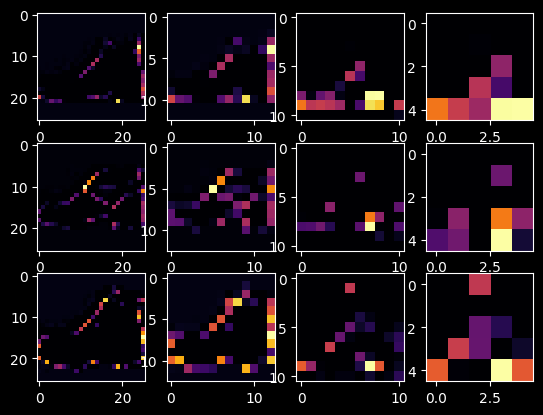

In [5]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

### EXERCÍCIOS

1. Tente editar as convoluções. Altere os 32s para 16 ou 64. Que impacto isso terá na precisão e/ou no tempo de treinamento?

2. Remova a convolução final. Que impacto isso terá na precisão ou no tempo de treinamento?

3. Que tal adicionar mais convoluções? Que impacto você acha que isso terá? Faça uma experiência com isso.

4. Remova todas as convoluções, exceto a primeira. Que impacto você acha que isso terá? Faça uma experiência. 

5. Na lição anterior, você implementou um retorno de chamada para verificar a função de perda e cancelar o treinamento quando ela atingir um determinado valor. Veja se você pode implementar isso aqui.